<a href="https://colab.research.google.com/github/Jv9545/Trabalho1_AnaliseDados/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho 1 - Analise de rotatividade de Clientes Bancários**<br>
**Desenvolvido por** José Vinicius e Vitor Faustino<Br>


*   Identicar os fatores que influenciam a saída dos clientes;
*   Comparar o perfil de clientes que saíram com os que permaneceram;
*   Desenvolver modelos preditivos de churn;
*   Trabalhar com variáveis categóricas e numéricas simultaneamente.


**ETAPA 1** - Carregando bibliotecas e base de dados

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive"

df = pd.read_csv(path + '/06_rotatividade_clientes_bancários.csv', sep=',')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ETAPA 2 - Visualizando a base de dados

In [39]:
print(f'A Base possui {df.shape[0]} registros;')
print(f'E há {df.shape[1]} variáveis.')
print(f'\nOs tipos das variaveis são do tipo:\n{df.dtypes}')

df.head(5)

A Base possui 10002 registros;
E há 14 variáveis.

Os tipos das variaveis são do tipo:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


ETAPA 3 - Tratando a base de dados

In [40]:
#Removendo colunas não usadas
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


ETAPA 3.1 - Verificando nulos

In [ ]:
# Verificando valores nulos
df.isnull().sum().rename('Quantidade').sort_values(ascending=False)
# Excluindo linhas com valores nulos
df.dropna(inplace=True)

ETAPA 4 - ESTATÍSTICAS INICIAS

In [65]:
cols= [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]
df[cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,650.555089,38.922311,5.012498,76491.112875,1.530194,100083.331145
std,96.661615,10.487200,2.891973,62393.474144,0.581639,57508.117802
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50983.750000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100185.240000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,149383.652500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


ETAPA 5 - Tipo de Distribuição de variaveis

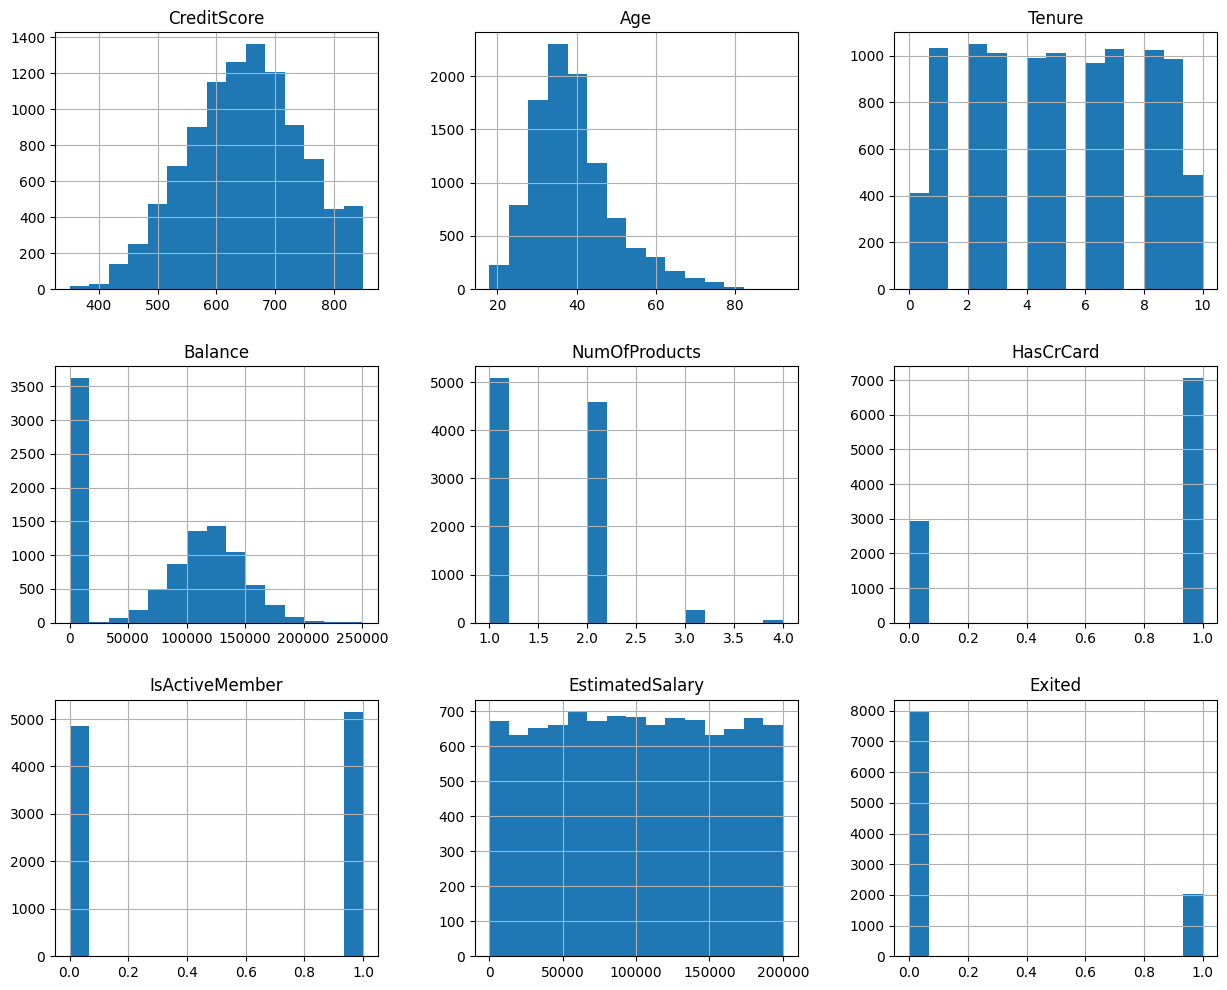

In [34]:
df.hist(bins=15, figsize=(15,12));

ETAPA 6 - Vizualizando Outliers

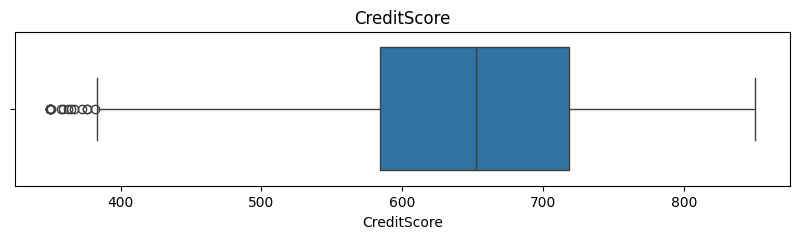

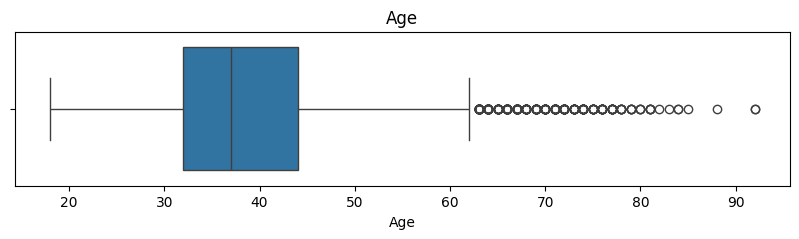

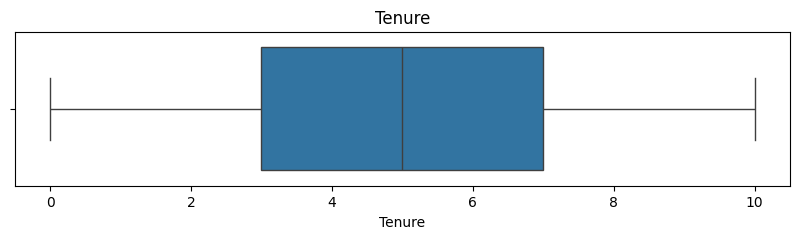

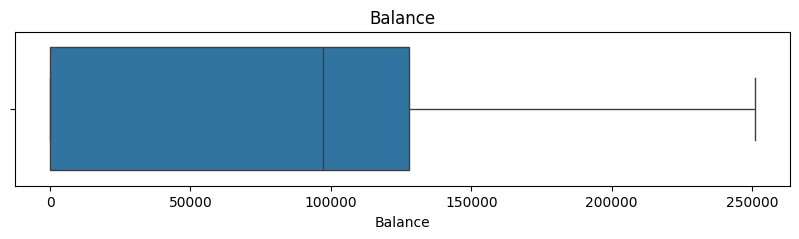

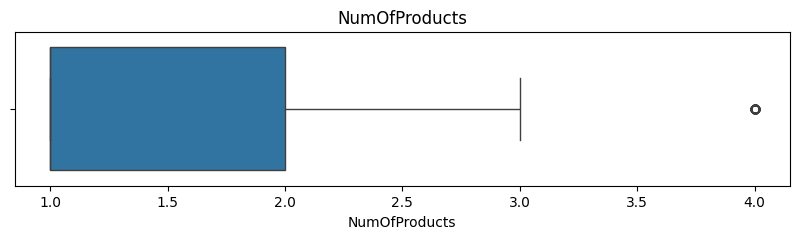

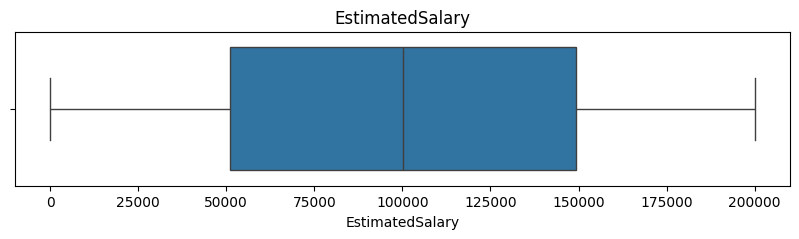

In [64]:
colunas_boxplot = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

for col in colunas_boxplot:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=df[col], orient='h')
    plt.title(f'{col}')
    plt.show()